In [ ]:
# https://www.youtube.com/watch?v=PPpKlPYL95c

import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
!wget 'http://images.cocodataset.org/val2017/000000037777.jpg'

--2023-08-18 12:54:49--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.136.185, 3.5.9.134, 3.5.25.143, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.136.185|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg.2’

000000037777.jpg.2  100%[===================>]  39.88K   182KB/s    in 0.2s    

2023-08-18 12:54:50 (182 KB/s) - ‘000000037777.jpg.2’ saved [40833/40833]



In [ ]:
ig = Image.open("/content/sample.JPEG")

In [ ]:
transform = T.ToTensor()
img = transform(ig)

In [ ]:
with torch.no_grad():
  pred = model([img])

In [ ]:
pred

[{'boxes': tensor([[1376.2673,  567.7260, 2048.0000, 1214.7205],
          [ 479.2607,  562.2629, 1393.2013, 1123.9139],
          [1201.1949, 1266.1451, 2024.4242, 1506.3170],
          [ 387.1094, 1108.5071,  521.8698, 1284.0394],
          [ 274.1460, 1121.3584,  391.5003, 1303.3394],
          [ 307.5818, 1004.9089,  337.6582, 1133.5332],
          [  16.6796,  552.6140,  556.0717, 1487.2688],
          [ 319.8374, 1028.0890,  376.9596, 1140.0973],
          [ 310.1918, 1007.7609,  336.5703, 1061.0857],
          [ 316.9477, 1029.6808,  373.7208, 1148.8427],
          [ 163.7193,  188.1780,  406.5275,  361.1253],
          [ 527.7476,  557.2323, 1393.1235, 1150.3506],
          [ 148.4392,  191.1940,  458.7012,  357.8348],
          [ 319.1326, 1113.5322,  482.5274, 1297.1322],
          [  52.5666,  315.3478,  788.8257,  565.0938],
          [ 310.5687, 1006.3737,  337.9717, 1039.8674],
          [ 296.2845, 1013.4155,  323.4288, 1138.7676],
          [ 884.6876, 1183.1969, 1178.8

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [ ]:
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [ ]:
num = torch.argwhere(scores > 0.8).shape[0]

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
igg = cv2.imread("/content/sample.JPEG")
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
  class_name = coco_names[labels.numpy()[i]-1]
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 2)
  igg = cv2.putText(igg, class_name, (x1, y1 -10), font, 1, (255, 0, 0), 2, cv2.LINE_AA)

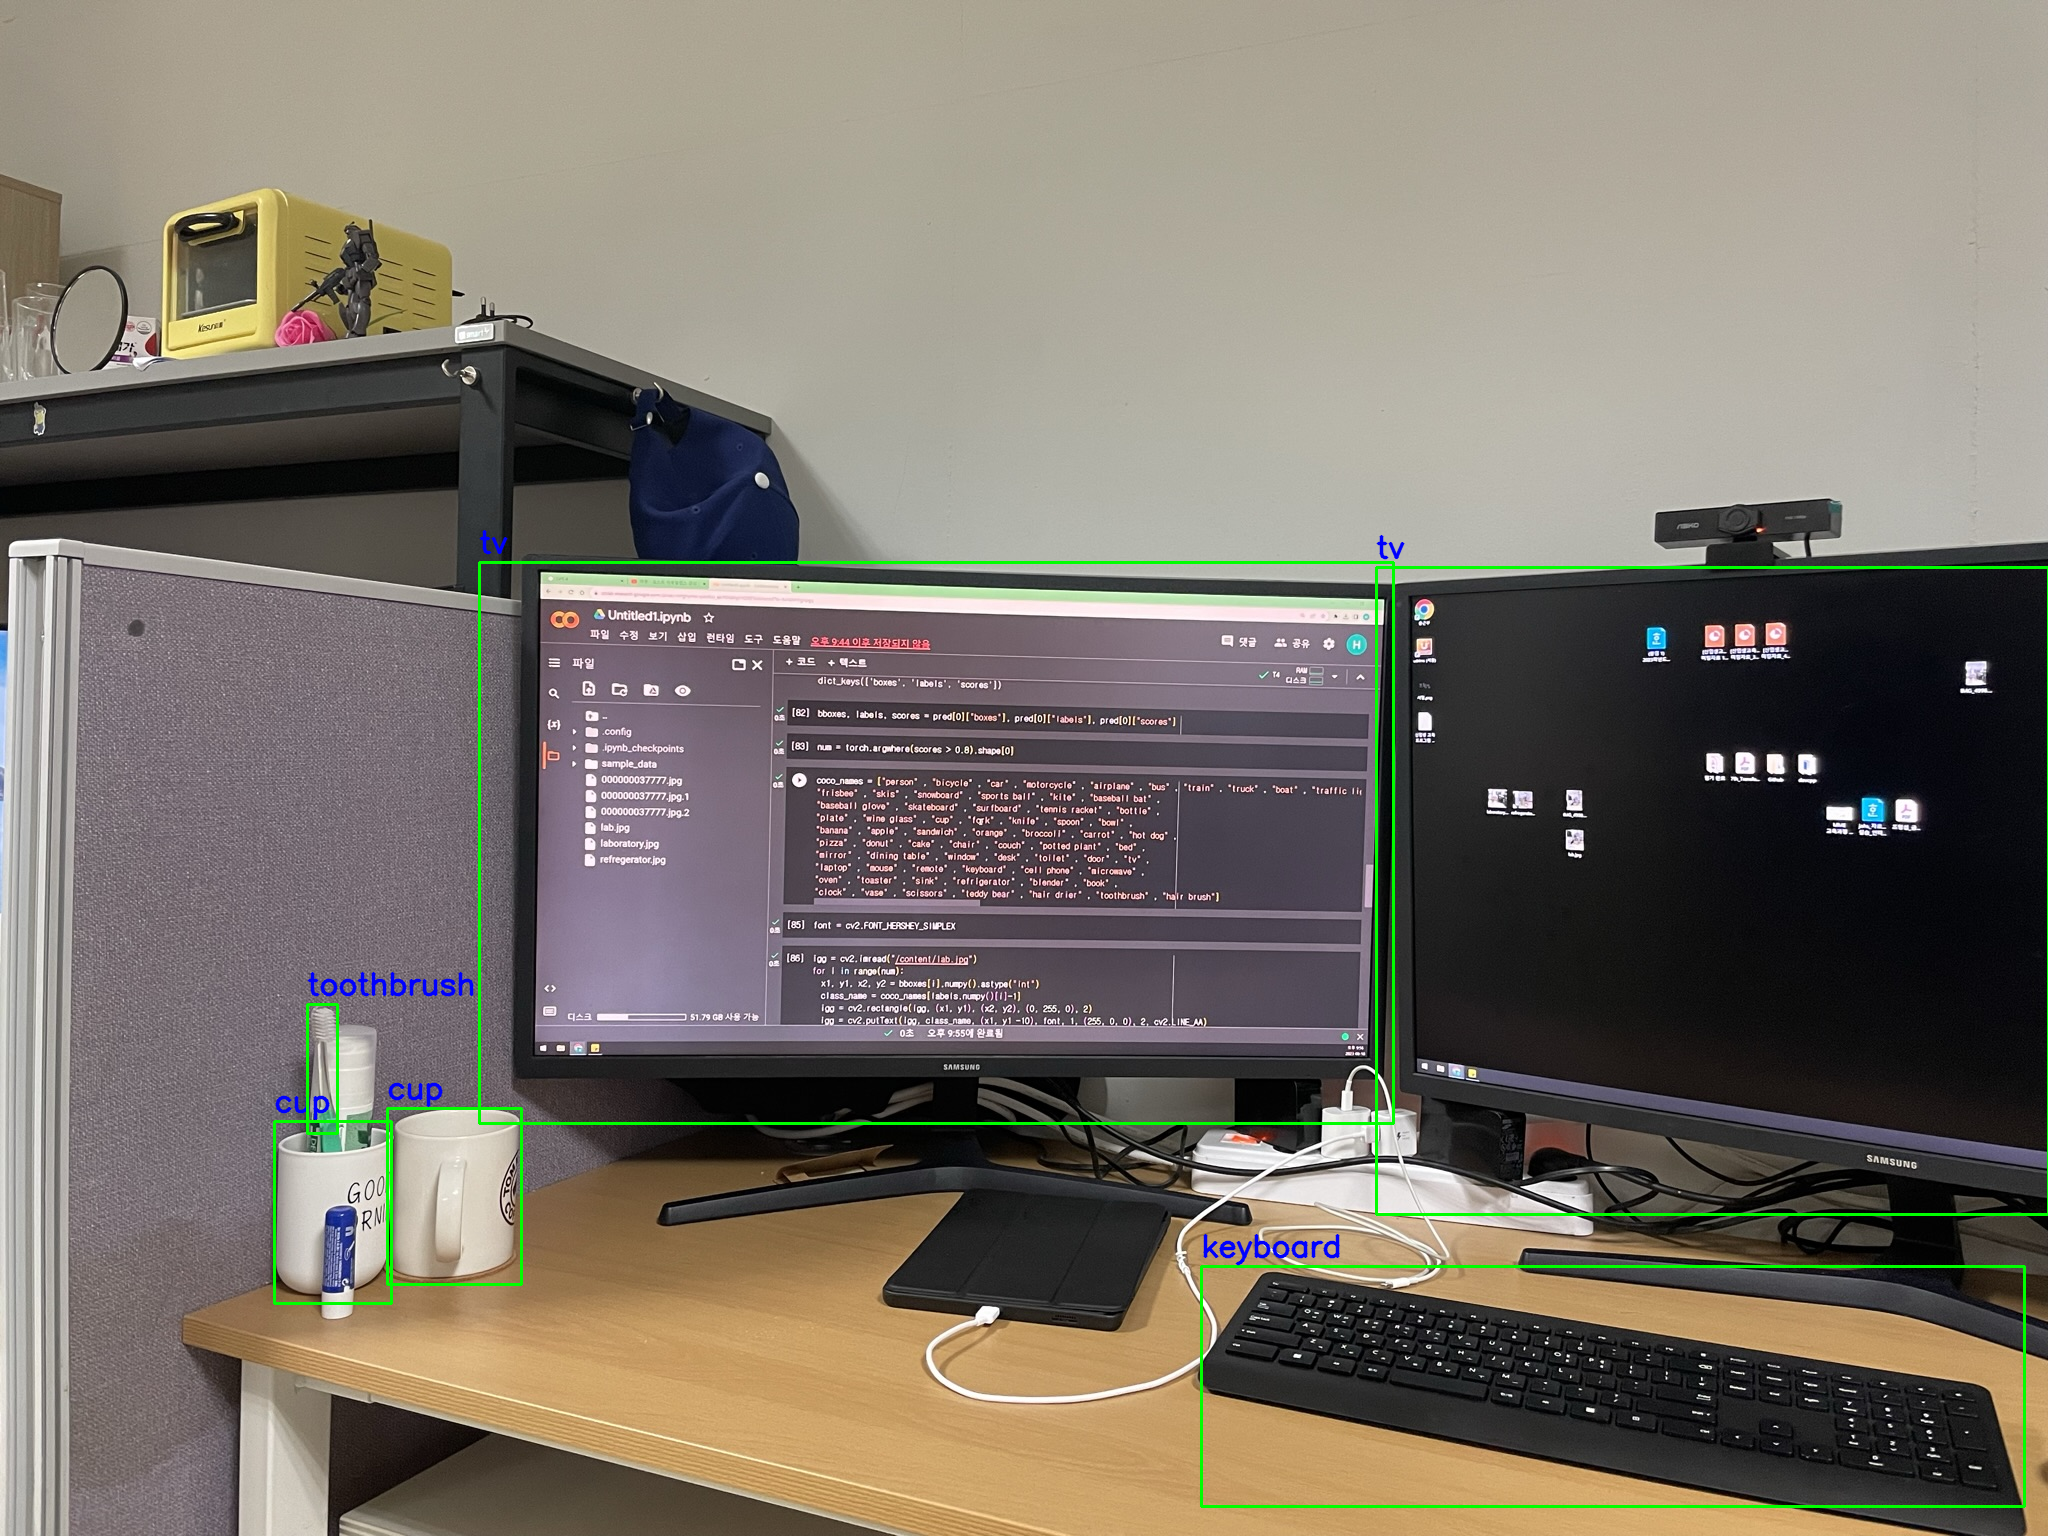

In [ ]:
cv2_imshow(igg)